# 파이썬을 활용한 행렬연산 (NumPy)

---
# 0. 파이썬 실습 환경 구성
본 파일은 Python 3 설치 환경을 필요로 합니다.

## 0-1. NumPy 설치 및 import

In [1]:
# NumPy 설치 및 import하기
%pip install numpy
import numpy as np

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


## 0-2. NumPy를 사용하는 이유

NumPy를 사용하는 중요한 이유 두 가지는 아래와 같이 볼 수 있습니다.<br>
일반적으로,

1. NumPy array는 Python list에 비해 메모리를 적게 차지합니다.<br>
왜냐하면, 한 배열 안에는 동일한 타입의 데이터만 저장하기 때문입니다. <br>

2. NumPy array 간의 연산은 Python list간의 연산보다 속도가 빠릅니다.<br>
왜냐하면, C array 형태로 데이터가 저장되기 때문입니다.<br>
(인터프레터 언어 대비 컴파일 언어가 가지는 장점)

위 내용을 예시 코드로 실습하며 이해해봅시다.

우선 NumPy array와 Python list간의 메모리 비교 예시 코드를 보겠습니다.

In [3]:
# 데이터 사이즈 측정을 위한 Symtem 모듈 import하기
import sys

In [4]:
# 길이가 1000인 Python list (e.g. range()) 생성하기
test_list = range(1000)

# Python list 내 각 원소별 사이즈
print("Python list 내 각 원소 사이즈:", sys.getsizeof(test_list), "bytes")
  
# 전체 list 사이즈
print("전체 Python list 사이즈: ", sys.getsizeof(test_list) * len(test_list), "bytes")

Python list 내 각 원소 사이즈: 48 bytes
전체 Python list 사이즈:  48000 bytes


In [5]:
# 길이가 1000인 NumPy 배열 (e.g. np.arange()) 생성하기
test_array = np.arange(1000)
  
# NumPy 배열 내 각 원소 사이즈
print("NumPy 배열 내 각 원소 사이즈:", test_array.itemsize, "bytes")

# 전체 NumPy 배열 사이즈
print("전체 NumPy 배열 사이즈:", test_array.size * test_array.itemsize, "bytes")

NumPy 배열 내 각 원소 사이즈: 8 bytes
전체 NumPy 배열 사이즈: 8000 bytes


다음은 NumPy array와 Python list간의 연산 속도 비교 예시 코드를 보겠습니다.

In [6]:
# for-loop을 활용한 Python list 간 덧셈 연산 함수 정의하기
def add_list(A, B):
	return [a + b for a, b in zip(A, B)]

# 예시 리스트 생성하기
test_list_1 = range(1, 1000, 1)
test_list_2 = range(1001, 2000, 1)

# Python list 간 덧셈 연산 함수의 실행시간 측정하기
%timeit add_list(test_list_1, test_list_2)

44.3 µs ± 72.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [7]:
# NumPy array 간 덧셈 연산 함수 정의하기
def add_array(A, B):
	np.add(A, B)

# 예시 리스트 생성하기
test_array_1 = np.arange(1, 1000, 1)
test_array_2 = np.arange(1001, 2000, 1)

# NumPy array 간 덧셈 연산 함수의 실행시간 측정하기
%timeit add_array(test_array_1, test_array_2)

476 ns ± 3.12 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


---
# 1. N차원 배열 (ndarray)

N차원 배열이란?

NumPy 공식홈페이지에 따르면 N차원 배열의 정의는 다음과 같습니다.<br>
* _N-dimensional array (ndarray)_ is a multidimensional container of items of the same type and size.

직역하면, 같은 타입과 크기를 가지는 원소들을 저장하는 어떤 한 다차원의 컨테이너 (자료형을 저장하는 객체)를 의미합니다.<br>
이는 곧 2차원 표 (데이터프레임) 형식의 데이터가

1. 같은 타입과 크기를 가지고
2. 다차원으로 일반화되었다

라고 이해하시면 좋을 것 같습니다.

그림으로 보면 더욱 이해가 쉽습니다.

## 1-1. N차원 배열 생성

NumPy의 가장 기본이 되는 N차원 배열을 1차원부터 차례대로 생성하는 실습을 해보겠습니다.<br>
Pandas에서 `DataFrame()` 메서드를 통해 2차원 데이터프레임을 생성했던 것처럼, NumPy에서는 `array()` 메서드를 통해 N차원 배열을 생성할 수 있는데요.<br>
우선 가장 간단한 형태인 1차원 배열 (e.g. 벡터)을 생성해보겠습니다.

In [9]:
# 1차원 배열 생성하기
array_1d = np.array([1, 2, 3])
print(array_1d)

# 타입 살펴보기
print(type(array_1d))

[1 2 3]
<class 'numpy.ndarray'>


NumPy의 `array()` 메서드는 배열 형태의 결과를 반환하는 메서드 또는 시퀀스 객체를 인자로 받아, 이를 N차원 (N $\in \natnums$)의 NumPy 배열로 변환해주는 역할을 합니다.

(참고로 0차원 또는 스칼라값을 인자로 받을 경우, NumPy는 0차원의 NumPy 배열을 반환)

In [10]:
# 리스트로 1차원 배열 생성하기
list_1d = [4, 5, 6]
array_1d = np.array(list_1d)
print(array_1d)

[4 5 6]


In [11]:
# 튜플로 1차원 배열 생성하기
tuple_1d = (7, 8, 9)
array_1d = np.array(tuple_1d)
print(array_1d)

[7 8 9]


또한 정의에 따라 NumPy 배열 내 데이터는 같은 사이즈를 가지고 있습니다.<br>
다시 말해, N차원 배열 그림 예시에서 보신 바와 같이 정해진 형태 (e.g. 사각형)를 가지고 있습니다.<br>
앞으로 데이터 분석을 하다보면 배열 간 형태가 맞지 않아 연산이 진행되지 않는 오류를 자주 접할 수 있습니다.<br>
이럴 때 반드시 확인해야 하는 것은 분석 대상인 NumPy 배열의 형태, 차원수, 그리고 사이즈입니다.

In [12]:
# shape 확인하기
print(array_1d.shape)

# ndim 확인하기
print(array_1d.ndim)

# size 확인하기
print(array_1d.size)

(3,)
1
3


다음은 2차원 배열 (e.g. 행렬)을 생성해보겠습니다.

In [13]:
# 2차원 배열 생성하기
array_2d = np.array([[1, 2, 3],
                     [4, 5, 6]])
print(array_2d)

# shape 확인하기
print(array_2d.shape)

# ndim 확인하기
print(array_2d.ndim)

# size 확인하기
print(array_2d.size)

[[1 2 3]
 [4 5 6]]
(2, 3)
2
6


다음은 3차원 배열 (e.g. 텐서)을 생성해보겠습니다.

In [14]:
# 3차원 배열 생성하기 (P)
array_3d = np.array([[[1, 2],
                     [3, 4]],
                     [[5, 6],
                     [7, 8]]])
print(array_3d)

# shape 확인하기 (P)
print(array_3d.shape)

# ndim 확인하기 (P)
print(array_3d.ndim)

# size 확인하기 (P)
print(array_3d.size)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
(2, 2, 2)
3
8


이외에도 N = $4, 5, 6, \ldots, n \in \natnums$에 이르기까지 임의의 자연수 n에 대하여 N차원 배열을 생성할 수 있습니다.

## 1-2. N차원 배열의 데이터 타입 지정

In [15]:
# 예시 데이터를 리스트로 저장하기
list_1d = [0, 1, 2]

# 정수형으로 지정하기
array_1d_int = np.array(list_1d, dtype = int)
print(array_1d_int)
print(array_1d_int.dtype)

# 실수형으로 지정하기
array_1d_float = np.array(list_1d, dtype = float)
print(array_1d_float)
print(array_1d_float.dtype) 

# 불형으로 지정하기
array_1d_boolean = np.array(list_1d, dtype = bool)
print(array_1d_boolean)
print(array_1d_boolean.dtype) # boolean

# 문자형으로 지정하기
array_1d_string = np.array(list_1d, dtype = str)
print(array_1d_string)
print(array_1d_string.dtype) # unicode 문자열

[0 1 2]
int64
[0. 1. 2.]
float64
[False  True  True]
bool
['0' '1' '2']
<U1


In [16]:
# 기 지정된 배열의 데이터 타입을 임의로 변경하기 (P)
# 힌트: .astype() 메서드 사용하기
print(array_1d_string.astype(bool)) # str -> bool 예시

[False  True  True]


## 1-3. 정해진 형식의 N차원 배열 생성

In [17]:
# 모든 요소가 0인 N차원 배열 생성하기
array_zeros = np.zeros([2, 2])
print(array_zeros)

# 모든 요소가 1인 N차원 배열 생성하기
array_ones = np.ones([3, 4])
print(array_ones)

# 모든 요소가 지정된 fill_value인 N차원 배열 생성하기
array_full = np.full([2, 3], 'fill_val')
print(array_full)

# NxN (또는 NxM) shape를 가진 대각 원소가 1인 행렬 생성하기
array_I = np.eye(3, 3) # I_n := identity matrix of size n
print(array_I)

[[0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[['fill_val' 'fill_val' 'fill_val']
 ['fill_val' 'fill_val' 'fill_val']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [18]:
# 예시 배열 생성하기
array_2d = np.array([[1,2,3],
                     [4,5,6]])

# 예시 배열을 모든 요소가 0인 배열의 형식으로 변형하기
array_2d_to_zeros = np.zeros_like(array_2d)
print(array_2d_to_zeros)

# 예시 배열을 모든 요소가 1인 배열의 형식으로 변형하기
array_2d_to_ones = np.ones_like(array_2d)
print(array_2d_to_ones)

# 예시 배열을 모든 요소가 지정된 fill_value인 배열의 형식으로 변형하기
array_2d_to_full = np.full_like(array_2d, 123) # 주의: 예시 배열의 dtype과 fill_value의 dtype 일치
print(array_2d_to_full)

[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]
[[123 123 123]
 [123 123 123]]


In [19]:
# np.empty() 로 N차원 배열 생성하기 (P)
array_empty = np.empty([2, 2])
print(array_empty)
print(array_zeros == array_empty)
# 결과: False, False, ...

[[2.22809558e-312 2.29175545e-312]
 [2.50395503e-312 2.29175545e-312]]
[[False False]
 [False False]]


In [20]:
# 교수자용 참고자료: np.empty()와 np.zeros()의 차이
array_zeros = np.zeros([2, 2])
array_empty = np.empty([2, 2])
print(array_empty)
print(array_zeros == array_empty)
# 결과: True, True, ... (순서대로 실행할 시 아마도 True일 것)
# 퀴즈: 위 현상의 이유는?
# 답. empty: 이전에 계산된 값을 재활용하는 zeros와 같고, 메모리를 아낄 수 있음

# 참고: np.empty_like() 도 존재함

[[0. 0.]
 [0. 0.]]
[[ True  True]
 [ True  True]]


## 1-4. 특정 범위의 값을 가지는 N차원 배열 생성

In [21]:
# 비교: Python 내장함수 range()
list_range = list(range(0, 10, 2)) # start, stop, step
print(list_range)

[0, 2, 4, 6, 8]


In [22]:
# NumPy의 arange()
array_arange = np.arange(0, 10, 2) # start, stop, step
print(array_arange)

[0 2 4 6 8]


In [23]:
# NumPy의 linspace()
array_linspace = np.linspace(0, 10, 5) # start, stop, num
print(array_linspace)

# np.linspace()의 num 값의 의미는? (P)
# 답: 일정한 간격으로 총 '몇 개'의 배열을 만들지 지정

[ 0.   2.5  5.   7.5 10. ]


In [24]:
# np.linspace()의 stop 값을 포함하지 않는 방법 (P)
array_linspace_end = np.linspace(0, 10, 5, endpoint = False) # start, stop, num
print(array_linspace_end)

[0. 2. 4. 6. 8.]


In [25]:
# NumPy의 logspace() (상용로그)
array_logspace = np.logspace(1, 10, 10) # start, stop, num
print(array_logspace)

# 밑이 2인 log의 logspace()
array_logspace_base_2 = np.logspace(1, 10, 10, base = 2) # start, stop, num
print(array_logspace_base_2)

# 비교: NumPy의 linspace()
print()
print(np.linspace(1, 10, 10))

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## 1-5. N차원 배열의 난수 생성

In [26]:
# 정규 분포에서 표본을 추출하는 난수 생성 함수 작성하기
array_randn = np.random.randn(10)
print(array_randn)

array_normal = np.random.normal(0, 1, 10)
print(array_normal)

# 퀴즈: 두 함수의 차이점은?
# np.random.randn은 '표준'정규분포에서 지정된 size의 난수 생성
# np.random.normal은 지정한 mu, sigma값을 갖는 정규분포에서 지정된 size의 난수 생성

[-0.20658107 -0.35588733 -0.58319697  0.21017465 -0.30892114  0.46516437
 -0.28828916 -0.00593012  0.73277952  0.03507216]
[ 1.21565197  0.36411482  0.60276749 -0.0263877  -1.33976536 -0.5937902
 -0.22146142 -0.8317663   1.1280809  -1.75920779]


In [27]:
# 데이터 시각화 라이브러리 matplotlib을 설치 및 import 하기
# pip install matplotlib
import matplotlib.pyplot as plt

array_normal_1d = np.random.normal(0, 1, 5) # loc, scale, size
print(array_normal_1d)

array_normal_2d = np.random.normal(0, 1, (2, 3)) # size는 NxM으로도 지정 가능
print(array_normal_2d)

[ 1.21414952e+00 -1.52858587e-01 -5.13443630e-04 -5.09116544e-01
 -1.27572538e+00]
[[ 1.72035382 -1.17318021  0.58866266]
 [ 1.62972778  0.42024641 -1.31036442]]


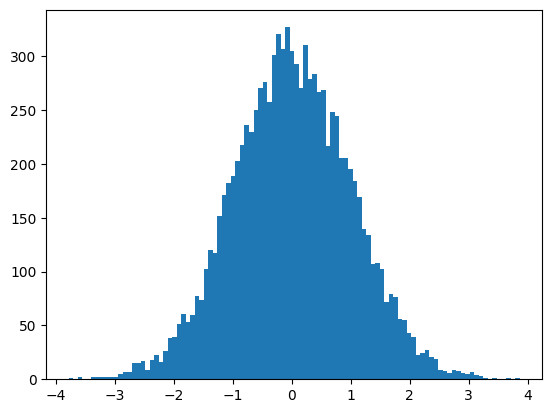

In [28]:
# matplotlib 활용하여 시각화하기 (P)
array_normal_10000 = np.random.normal(0, 1, 10000) # loc, scale, size
plt.hist(array_normal_10000, bins = 100)
plt.show()

In [29]:
# 균등 분포에서 표본을 추출하는 난수 생성 함수 작성하기
array_rand = np.random.rand(10) # ~ U(0, 1)
print(array_rand)

[0.98704204 0.32612649 0.45650039 0.80068587 0.15359295 0.08161255
 0.85514837 0.70860833 0.91437117 0.67275474]


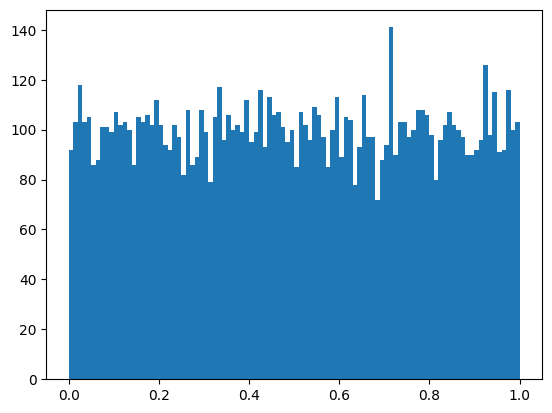

In [30]:
# matplotlib 활용하여 시각화하기 (P)
array_rand_10000 = np.random.rand(10000)
plt.hist(array_rand_10000, bins = 100)
plt.show()

In [31]:
# 랜덤한 정수를 생성하는 함수 작성하기
array_randint = np.random.randint(1, 10, 10) # low, high, size; sample from discrete uniform [low, high)
print(array_randint)

[5 4 9 2 6 1 2 8 5 3]


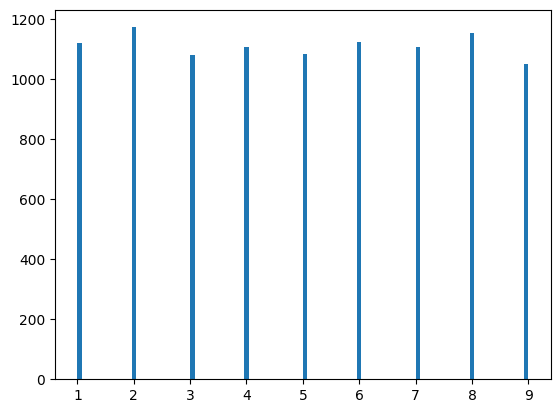

In [32]:
# matplotlib 활용하여 시각화하기 (P)
array_randint_10000 = np.random.randint(1, 10, 10000)
plt.hist(array_randint_10000, bins = 100)
plt.show()

In [33]:
import numpy as np

In [34]:
# 배열에서 랜덤 추출
## np.random.choice(추출할 배열 혹은 최대 정수, size=개수, replace=복원 추출 여부)

np.random.choice(5, 3, replace=False) # 0~4까지의 정수 중 3개를 비복원 추출

array([0, 2, 3])

In [35]:

fruit_basket = ['apple', 'banana', 'cherry', 'watermelon', 'grape', 
                'orange', 'mango', 'pineapple', 'strawberry', 'kiwi']

fruits = np.random.choice(fruit_basket, size=5, replace=True)
print(fruits)

['orange' 'orange' 'cherry' 'kiwi' 'apple']


In [36]:
# 실습 - 이번 주 로또 번호 시뮬레이션
# 1~45까지의 숫자 중 6개를 랜덤으로 뽑아서 출력하는 프로그램을 만들어보세요.
# 중복된 숫자는 나오면 안됨

np.random.seed(2023)
my_lotto = np.random.choice(range(1,46), 6, replace=False)
print(my_lotto)

[22 30  3 32 10 41]


## 1-6. 랜덤 시드 (seed) 값을 고정하여 난수 제어

In [37]:
# 시드 값을 이용해 난수의 발생 지점을 고정하기 (P)
np.random.seed(2)
array_randint_setseed = np.random.randint(1, 10, 10) # low, high, size; ~ discrete_uniform[low, high)
print(array_randint_setseed)

[9 9 7 3 9 8 3 2 6 5]


In [38]:
# 교수자용 참고자료: seed를 고정하면 같은 난수 생성 코드를 다회 실행해도 같은 결과를 생성
np.random.seed(2)
array_randint_setseed = np.random.randint(1, 10, 10) # low, high, size; ~ discrete_uniform[low, high)
print(array_randint_setseed)

[9 9 7 3 9 8 3 2 6 5]


In [39]:
# 이번 주 로또 번호 시뮬레이션 다시 해보기 
### ([22 30  3 32 10 41]이 나와야 함)

---
# 2. N차원 배열 인덱싱

## 2-1. NumPy 기본 인덱싱

In [40]:
# 1차원 배열 생성하기
np.random.seed(2023)
array_1d = np.random.randint(1, 10, 10)
print(array_1d)

# 배열의 첫번째 인자 추출하기
print(array_1d[0]) # list 인덱싱과 동일

# 범위로 인덱싱하기 (슬라이싱)
print(array_1d[0:1]) # list 인덱싱과 동일; array[start, end] = [start, end)

[8 7 8 2 4 5 5 7 6 1]
8
[8]


In [41]:
# 2차원 배열 생성하기 (P)
np.random.seed(2023)
array_2d = np.random.randint(1, 10, (3, 4))
print(array_2d)

# 배열의 첫번째 인자 추출하기 (P)
print(array_2d[0]) # list 인덱싱과 동일; 첫번째 리스트를 추출
print(array_2d[0][0]) # list 인덱싱과 동일; 첫번째 리스트의 첫번째 인자를 추출
print(array_2d[0, 0]) # NumPy의 행렬 인덱싱; (dim_0, dim_1)
# 비교 샘플 리스트: list_spl = [[8, 7, 8, 2], [4, 5, 5, 7], [6, 1, 7, 2]]

# 범위로 인덱싱하기 (슬라이싱) (P)
print(array_2d[0:2]) # list 인덱싱과 동일; array[start, end] = [start, end)
print(array_2d[1:, :2]) # NumPy의 행렬 인덱싱; (dim_0, dim_1)

[[8 7 8 2]
 [4 5 5 7]
 [6 1 7 2]]
[8 7 8 2]
8
8
[[8 7 8 2]
 [4 5 5 7]]
[[4 5]
 [6 1]]


## 2-2. Fancy 인덱싱 활용

Fancy indexing은 한 NumPy 배열에 대해

- 또 다른 NumPy 배열
- Python list
- 정수 시퀀스 e.g. range()

를 활용하여 NumPy 배열을 인덱싱할 수 있도록 해주는 기법입니다.

In [42]:
# 1차원 배열 난수 생성하기
np.random.seed(2023)
array_1d = np.random.randint(1, 10, 10)
print(array_1d)

# 1차원 배열 Fancy 인덱싱하기
index = [0, 1, 2] # np.array([0, 1, 2])도 가능
print(array_1d[index])

[8 7 8 2 4 5 5 7 6 1]
[8 7 8]


In [43]:
# 2차원 배열 난수 생성하기 (P)
np.random.seed(2023)
array_2d = np.random.randint(1, 10, (2, 5))
print(array_2d)

# 2차원 배열 Fancy 인덱싱하기 (P)
index = [0, 1, 2] # np.array([0, 1, 2])도 가능
print(array_2d[:, index])

[[8 7 8 2 4]
 [5 5 7 6 1]]
[[8 7 8]
 [5 5 7]]


## 2-3. 불형 & 조건 연산자 인덱싱

In [44]:
# 1차원 배열 난수 생성하기
np.random.seed(2023)
array_1d = np.random.randint(1, 10, 5)
print(array_1d)

# Boolean 리스트를 이용한 불형 인덱싱하기
boolean_list = [True, False, True, False, False]
print(array_1d[boolean_list])

[8 7 8 2 4]
[8 8]


In [45]:
# 조건 연산자를 활용하여 조건에 맞는 배열의 값만 출력하기 (P)
condition_spl = array_1d > 7
print(condition_spl)
print(array_1d[condition_spl])

[ True False  True False False]
[8 8]


---
# 3. N차원 배열 연산법

## 3-1. 배열 연산 - 기본

NumPy에서는 Python 연산자와 동일하게 산술연산 수행이 가능합니다.

In [47]:
# 예시 배열 생성하기
array_1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
array_2 = np.array([[5, 5, 5],
                    [5, 5, 5],
                    [5, 5, 5]])

In [48]:
# 덧셈하기 (P)
print(array_1 + array_2)

[[ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [49]:
# 뺄셈하기 (P)
print(array_1 - array_2)

[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]


In [50]:
# 곱셈하기 (요소별 곱셈) (P)
print(array_1 * array_2) # 아다마르 곱 (Hadamard product); https://en.wikipedia.org/wiki/Hadamard_product_(matrices)#Analogous_operations

[[ 5 10 15]
 [20 25 30]
 [35 40 45]]


In [51]:
# 나눗셈하기 (요소별 나눗셈) (P)
print(array_1 / array_2) # 아다마르 나눗셈 (Hadamard division)

[[0.2 0.4 0.6]
 [0.8 1.  1.2]
 [1.4 1.6 1.8]]


In [52]:
# 몫, 나머지 구하기 (P)
print(array_1 // array_2)
print(array_1 % array_2)

[[0 0 0]
 [0 1 1]
 [1 1 1]]
[[1 2 3]
 [4 0 1]
 [2 3 4]]


In [53]:
# 제곱, 제곱근 구하기 (P)
print(array_1 ** 2)

# NumPy 함수 활용하기 (P)
print(np.square(array_1))
print(np.sqrt(array_1))

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]


In [54]:
# n제곱, n제곱근 구하기 (P)
print(array_1 ** array_2)

# NumPy 함수 활용하기
print(np.power(array_1, array_2))
print(np.power(array_1, 1/array_2))

[[    1    32   243]
 [ 1024  3125  7776]
 [16807 32768 59049]]
[[    1    32   243]
 [ 1024  3125  7776]
 [16807 32768 59049]]
[[1.         1.14869835 1.24573094]
 [1.31950791 1.37972966 1.43096908]
 [1.47577316 1.51571657 1.55184557]]


## 3-2. 배열 연산 - 값 대체

In [55]:
# 예시 1차원 배열 생성하기
np.random.seed(2023)
array_rand = (np.random.rand(5)) * 4 # [x1 x2 ... x5] ~ U(0, 4)
print(array_rand)

[1.28795322 3.56168981 2.35220902 0.50638437 0.56536489]


In [56]:
# 절댓값 계산하기 (P)
print(np.abs(array_rand))

# 올림하기 (P)
print(np.ceil(array_rand)) # i >= x

# 내림하기 (P)
print(np.floor(array_rand)) # i <= x

# 반올림하기 (P)
print(np.round(array_rand)) # np.around 는 alias of np.round

# 버림하기 (P)
print(np.trunc(array_rand)) # fractional part가 버려짐

[1.28795322 3.56168981 2.35220902 0.50638437 0.56536489]
[2. 4. 3. 1. 1.]
[1. 3. 2. 0. 0.]
[1. 4. 2. 1. 1.]
[1. 3. 2. 0. 0.]


## 3-3. 배열 연산 - 비교 연산

In [57]:
# 예시 배열 생성하기
array_1 = np.array([[1, 2],
                    [3, 4]])
array_2 = np.array([[2, 2],
                    [2, 2]])

# 비교 연산자를 활용하여 논리 변수 (불형) 배열 출력하기 (P)
print(array_1 == array_2)
print(array_1 > array_2)

# 배열 전체가 모두 일치하는지 보는 NumPy 함수 (P)
print(np.array_equal(array_1, array_2)) # np.array_equiv도 있으나, 둘 간의 차이는 3-8. 브로드캐스팅에서 설명 가능

[[False  True]
 [False False]]
[[False False]
 [ True  True]]
False


## 3-4. 배열 연산 - 기초통계량 계산

In [58]:
# 2차원 배열 생성하기
np.random.seed(2023)
array_2d = np.random.randint(1, 10, (2, 4))
print(array_2d)

[[8 7 8 2]
 [4 5 5 7]]


In [59]:
# 배열 내 원소들 중 최솟값 구하기 (P)
print(np.min(array_2d)) # axis = None: 전역 최소값
print(np.min(array_2d, axis = 0)) # axis = 0: 행기준 (위아래로 비교하며) 최소값
print(np.min(array_2d, axis = 1)) # axis = 1: 열기준 (좌우로 비교하며) 최소값

# 배열 내 원소들 중 최댓값 구하기 (P)
print(np.max(array_2d))

# 배열 원소들의 합 구하기 (P)
print(np.sum(array_2d))

# 배열 원소의 평균값 구하기 (P)
print(np.mean(array_2d))

# 배열 원소의 표준편차 구하기 (P)
print(np.std(array_2d))

# 배열 원소의 누적 합 구하기 (P)
print(np.cumsum(array_2d))

# 배열 원소의 중앙값 구하기 (P)
print(np.median(array_2d))

2
[4 5 5 2]
[2 4]
8
46
5.75
1.984313483298443
[ 8 15 23 25 29 34 39 46]
6.0


최소, 최대와 같은 전형적인 기초통계량 외에도 NumPy를 활용하면 다양한 통계 정보를 출력할 수 있습니다.<br>
그 중 고유값 (unique value)을 반환하는 방법으로는 `unique()` 메서드가 있습니다.<br>

In [60]:
# 1차원 배열 생성하기
np.random.seed(2023)
array_1d = np.random.randint(1, 10, 20)
print(array_1d)

# NumPy 배열 내 고유값 반환하기 (P)
print(np.unique(array_1d))

[8 7 8 2 4 5 5 7 6 1 7 2 6 8 6 9 3 4 2 1]
[1 2 3 4 5 6 7 8 9]


`unique()` 메서드의 인자를 잘 사용하면, 판다스의 `value_counts()` 메서드와 비슷하게 배열 내 고유값 별 빈도도 확인할 수 있습니다.

In [61]:
# NumPy 배열 내 고유값과 고유값별 빈도까지 반환하기 (P)
print(np.unique(array_1d, return_counts=True))

# print(np.array(np.unique(array_1d, return_counts=True)).T) # 판다스의 value_counts() 메서드 결과처럼 왼쪽엔 unique value, 오른쪽엔 frequency를 보여줄 수 있음

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 3, 1, 2, 2, 3, 3, 3, 1]))


기초통계량을 계산하는 메서드 중 최소값, 최대값을 계산하는 메서드 앞에 `arg-` 접두사를 붙여 해당 결과에 해당하는 인덱스를 반환할 수 있습니다.

In [62]:
# arg 함수 알아보기
# 배열 내 원소들 중 최솟값의 인덱스를 구하기 (P)
print(np.argmin(array_2d))
print(np.argmin(array_2d, axis = 0))
print(np.argmin(array_2d, axis = 1))

# 배열 내 원소들 중 최댓값의 인덱스를 구하기 (P)
print(np.argmax(array_2d))
print(np.argmax(array_2d, axis = 0))
print(np.argmax(array_2d, axis = 1))

3
[1 1 1 0]
[3 0]
0
[0 0 0 1]
[0 3]


최소, 최대 외에도 다양한 조건을 활용하여 해당 조건을 만족하는 인덱스를 반환하도록 하는 `np.where()` 메서드의 사용법을 익혀봅시다.

In [63]:
# 1차원 배열 생성하기
np.random.seed(2023)
array_1d = np.random.randint(1, 10, 5)
print(array_1d)

[8 7 8 2 4]


In [64]:
# np.where() 로 5 이하의 값들의 인덱스를 반환하기 (P)
print(np.where(array_1d <= 5)) # 참고) np.where(condition)의 형태로 사용할 경우에만 해당 조건을 만족하는 인덱스를 반환함
print(np.where(array_1d <= 5, '5이하', '5초과')) # np.where(condition, True일 때 반환값, False일 때 반환값) 형태로 작성하였을 때의 형태

(array([3, 4]),)
['5초과' '5초과' '5초과' '5이하' '5이하']


**심화**<br>
결측치가 있는 배열에서 최대, 최소, 합계 등을 계산하는 방법을 배워봅시다.

In [65]:
# 심화: 결측치가 있는 배열
array_2d_nan = np.array([[1, np.nan],
                         [3, 4]])
print(array_2d_nan)

[[ 1. nan]
 [ 3.  4.]]


In [66]:
# NaN 값이 있으면 최솟값/최댓값/합계 계산이 제대로 작동하지 않음
print(np.min(array_2d_nan))
print(np.max(array_2d_nan))
print(np.sum(array_2d_nan))

nan
nan
nan


In [67]:
# 해결방법 (P)
# 방법 1. np.ma.array와 같이 masked array와 결측 mask를 따로 지정하기
array_masked = np.ma.array(np.matrix([[1, 2], [3, 4]]),
                           mask = [[False, True], [True, False]],
                           fill_value = 9999)
print(array_masked)

print(np.min(array_masked))
print(np.max(array_masked))
print(np.sum(array_masked))

# 방법 2. np.nanmin처럼 nan 전용 함수를 사용하여 nan을 무시하고 계산하기
print(np.nanmin(array_2d_nan))
print(np.nanmax(array_2d_nan))
print(np.nansum(array_2d_nan))

[[1 --]
 [-- 4]]
1
4
5
1.0
4.0
8.0


## 3-5. 배열 연산 - 지수 / 로그 / 삼각 함수

In [68]:
# 예시 배열 생성하기
array_1 = np.array([[1, 2],
                    [3, 4]])

# 자연지수함수 구하기 (P)
print(np.exp(array_1))

# 자연로그함수 구하기 (P)
print(np.log(array_1))

# 상용로그함수 구하기 (P)
print(np.log10(array_1))

# pi 값 출력하기 (P)
print(np.pi) # np.math.pi에도 동일하게 구현됨

[[ 2.71828183  7.3890561 ]
 [20.08553692 54.59815003]]
[[0.         0.69314718]
 [1.09861229 1.38629436]]
[[0.         0.30103   ]
 [0.47712125 0.60205999]]
3.141592653589793


In [69]:
# 삼각함수 sin값 구하기 (P)
print(np.sin(array_1))

# 삼각함수 cos값 구하기 (P)
print(np.cos(array_1))

# 삼각함수 tan값 구하기 (P)
print(np.tan(array_1))

# 삼각함수 tanh값 구하기 (P)
print(np.tanh(array_1))

[[ 0.84147098  0.90929743]
 [ 0.14112001 -0.7568025 ]]
[[ 0.54030231 -0.41614684]
 [-0.9899925  -0.65364362]]
[[ 1.55740772 -2.18503986]
 [-0.14254654  1.15782128]]
[[0.76159416 0.96402758]
 [0.99505475 0.9993293 ]]


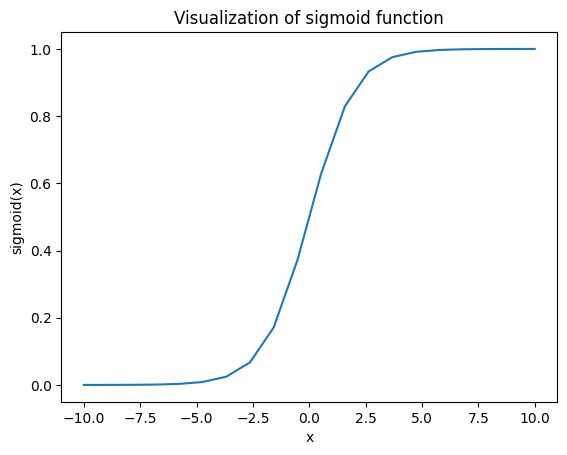

In [70]:
# 실습: sigmoid 함수 구현하기 (P)
x = np.linspace(-10, 10, 20) # linspace 배열: [-10, 10] with size of 20
y = 1 / (1 + np.exp(-x)) # sigmoid 함수
# z = np.tanh(x)
  
# matplotlib으로 시각화하기 (P)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title('Visualization of sigmoid function')
  
plt.show()

## 3-6. 배열 연산 - 내적 연산

NumPy에서는 행렬 간 내적, 역행렬 계산을 포함한 다양한 행렬 연산을 지원합니다.

__내적:__<br>
$m \times n$ 행렬 $A$와 $n \times p$ 행렬 $B$를 내적한 $n \times p$ 행렬 $C$는
$$
A \cdot B = C
$$
로 정의합니다.

이때 $A, B, C$ 각 행렬의 원소는
$$
\begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1n}\\
    a_{21} & a_{22} & \cdots & a_{2n}\\ 
    \vdots & \vdots & \ddots & \vdots\\ 
    a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
\cdot
\begin{bmatrix}
    b_{11} & b_{12} & \cdots & b_{1p}\\
    b_{21} & b_{22} & \cdots & b_{2p}\\ 
    \vdots & \vdots & \ddots & \vdots\\ 
    b_{n1} & b_{n2} & \cdots & b_{np} 
\end{bmatrix}
=
\begin{bmatrix}
    c_{11} & c_{12} & \cdots & c_{1p}\\
    c_{21} & c_{22} & \cdots & c_{2p}\\ 
    \vdots & \vdots & \ddots & \vdots\\ 
    c_{m1} & c_{m2} & \cdots & c_{mp} 
\end{bmatrix}
$$

$$
c_{ij}= a_{i1} b_{1j} + a_{i2} b_{2j} +\cdots+ a_{in} b_{nj} = \sum_{k=1}^n a_{ik}b_{kj}
$$
와 같이 표현할 수 있습니다.

In [71]:
# 예시 2차원 배열 생성하기
array_1 = np.array([[1, 2],
                    [3, 4]])
array_2 = np.array([[2, 3],
                    [4, 5]])

In [72]:
# 2차원 배열의 내적 계산하기
print(np.dot(array_1, array_2))
# 참고) 2D 행렬 연산이므로 np.matmul() 또는 @을 사용할 수 있으나, 3D tensor 연산부터는 달라짐에 유의

[[10 13]
 [22 29]]


In [73]:
# 임의의 크기로 세 개의 행렬 A, B, C를 만들어 모두 내적하기 (P)
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
C = np.array([[1],
              [2],
              [3],
              [4]])

# 내적 계산 (P)
print(np.dot(np.dot(A, B), C)) # print(np.dot(A, np.dot(B, C)))도 가능

[[ 500]
 [1130]]


편리하게도, NumPy에는 이미 다수 행렬 간의 내적이 함수로 정의되어 있습니다.

In [74]:
# 다수의 행렬 내적 계산 (P)
print(np.linalg.multi_dot([A, B, C]))
print(A @ B @ C)

[[ 500]
 [1130]]
[[ 500]
 [1130]]


## 3-7. 배열 연산 - 역행렬 계산

위에서 본 NumPy의 linalg 모듈을 활용하면 행렬의 역행렬 (inverse matrix)을 구할 수 있습니다.

__역행렬:__<br>
$n \times n$ 정방행렬 $A$의 역행렬은 $A^{-1}$와 같이 표기하며, 아래와 같이 행렬곱의 항등원인 $n \times n$ 단위행렬 $I_n$ (또는 간단히 $I$)가 나오도록 하는 행렬을 행렬 $A$의 역행렬이라고 정의합니다.
$$
A A^{-1} = A^{-1} A = I
$$

예를 들어, $2 \times 2$ 정방행렬 $X$는
$$
X = 
\begin{bmatrix}
    x_{11} & x_{12}\\
    x_{21} & x_{22} 
\end{bmatrix}
$$
와 같이 표현할 수 있으며, 그 역행렬 $X^{-1}$은 행렬식이 0이 아니라고 가정할 때
$$
X^{-1} = 
\frac{1}{x_{11}x_{22} - x_{12}x_{21}}
\begin{bmatrix}
     x_{22} & -x_{12}\\
    -x_{21} &  x_{11} 
\end{bmatrix}
$$
와 같이 표현할 수 있습니다.<br>
만약 행렬식이 0이 아니라면 역행렬 $X^{-1}$는 존재하지 않습니다.

In [75]:
# NumPy의 linalg 모듈 활용하여 역행렬 구하기 (P)
array_1 = np.array([[1, 2],
                    [3, 4]])
array_1_inv = np.linalg.inv(array_1)
print(array_1_inv)

## 정방행렬 (square matrix)가 아닐 시 역행렬 계산이 불가함을 유의
# A = np.array([[1, 2, 3],
#               [4, 5, 6]])
# print(np.linalg.inv(array_1))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [76]:
# NumPy의 linalg 모듈 활용하여 만든 역행렬 검증하기 (P)

# A * A^{-1} = I
print(np.dot(array_1, array_1_inv).round()) # 역행렬 계산시 행렬식(determinant)로 나눠줄 때 float 이슈 발생하기에 round 적용

# A^{-1} * A = I
print(np.dot(array_1_inv, array_1).round()) # 역행렬 계산시 행렬식(determinant)로 나눠줄 때 float 이슈 발생하기에 round 적용

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


## 3-8. 브로드캐스팅 (broadcasting)

브로드캐스팅 (broadcasting)이란 NumPy가 서로 다른 모양의 배열에 대해서도 산술 연산이 수행 가능하도록 처리하는 방법을 의미합니다.

NumPy의 브로드캐스팅 기능은 특정 제약 조건에 따라 어느 한 작은 N차원 배열이 또 다른 큰 N차원 배열에 호환되는 모양을 갖도록 작동하고, Python 대신 C에서 루프가 발생하도록 N차원 배열 작업을 벡터화하는 수단을 제공합니다.

해당 기능이 작동하는 대표적인 조건은 아래와 같습니다.
* 원소가 하나인 배열은 다른 어떤 배열에나 가능<br>
  (단, 원소가 하나도 없는 빈 배열은 제외)
* 배열의 차원이 1이고 나머지 차원이 동일하면 가능
* 두 배열이 뒤에서부터 대응하는 축의 크기가 동일하면 가능

In [78]:
# 조건 1
'''
원소가 하나인 배열은 다른 어떤 배열에나 가능
(단, 원소가 하나도 없는 빈 배열은 제외)

예시 형태:
   (2, 3)    + (1,)  ->     (2, 3)    +     (2, 3)

[[a, b, c],  +  [n]  ->  [[a, b, c],  +  [[n, n, n], 
 [d, e, f]]               [d, e, f]]      [n, n, n]]
'''

# 예시
array_1 = np.array([[1, 2, 3],
                    [4, 5, 6]])
array_2 = np.array([100])
print(array_1 + array_2)

[[101 102 103]
 [104 105 106]]


In [79]:
# 조건 2
'''
배열의 차원이 1이고 나머지 차원이 동일하면 가능

예시 형태 1:
   (2, 3)    +    (3,)     ->     (2, 3)    +     (2, 3)

[[a, b, c],  +  [g, h, i]  ->  [[a, b, c],  +  [[g, h, i],
 [d, e, f]]                     [d, e, f]]      [g, h, i]]
'''

# 예시 1
array_3 = np.array([[1, 3, 5],
                    [7, 9, 11]])
array_4 = np.array([1, 2, 3])
print(array_1 + array_3)

'''
예시 형태 2:
(3, 1) +    (3,)     ->     (3, 3)    +     (3, 3)
[[a],     [d, e, f]      [[a, a, a],     [[d, e, f],
 [b],  +             ->   [b, b, b],  +   [d, e, f],   
 [c]]                     [c, c, c]]      [d, e, f]]
 '''

# 예시 2
array_4 = np.array([[1], 
                    [2],
                    [3]])
array_4 = np.array([5, 10, 15])
print(array_3 + array_4)

[[ 2  5  8]
 [11 14 17]]
[[ 6 13 20]
 [12 19 26]]


In [80]:
# 조건 3
'''
두 배열이 뒤에서부터 대응하는 축의 크기가 동일하면 가능

예시:
(2, 3, 2)   +  (  3, 2)  ->  (2, 3, 2)   +  (2, 3, 2) 
[[[a, b],      [[m, n],      [[[a, b],      [[[m, n],
  [c, d],       [o, p],        [c, d],        [o, p],
  [e, f]],  +   [q, r]]  ->    [e, f]],  +    [q, r]
 [[g, h],                     [[g, h],       [[m, n],
  [i, j],                      [i, j],        [o, p],
  [k, l]]]                     [k, l]]]       [q, r]]]
'''

# 예시 1
array_5 = np.array([[[1, 2], 
                     [3, 4],
                     [5, 6]],
                    [[7, 8],
                     [9, 10],
                     [11, 12]]]) # (2, 3, 2)
array_6 = np.array([[1, 2], 
                    [3, 4],
                    [5, 6]])     # (   3, 2)
print(array_5 + array_6)

# 예시 2
array_7 = np.array([[[1, 2, 3], 
                     [4, 5, 6]],
                    [[7, 8, 9],
                     [10, 11, 12]]]) # (2, 2, 3)
array_8 = np.array([[1, 2, 3], 
                    [4, 5, 6]])      # (   2, 3)
print(array_7 + array_8)

[[[ 2  4]
  [ 6  8]
  [10 12]]

 [[ 8 10]
  [12 14]
  [16 18]]]
[[[ 2  4  6]
  [ 8 10 12]]

 [[ 8 10 12]
  [14 16 18]]]


---
# 4. N차원 배열의 형태 변경

## 4-1. 1차원 배열의 정렬

In [82]:
# 예시 배열 생성하기
np.random.seed(2023)
array_1d = np.random.randint(1, 10, 10)
print(array_1d)

[8 7 8 2 4 5 5 7 6 1]


In [83]:
# 1차원 배열 오름차순 정렬하기 (P)
print(np.sort(array_1d))

# 1차원 배열 내림차순 정렬하기 (P)
print(np.sort(array_1d)[::-1])

# 참고) 원본 배열은 변하지 않음
print(array_1d)

[1 2 4 5 5 6 7 7 8 8]
[8 8 7 7 6 5 5 4 2 1]
[8 7 8 2 4 5 5 7 6 1]


In [84]:
# 교수자용 참고자료: 정렬된 배열을 얻고 싶다면?

# 방법 1. 정렬된 배열을 새로운 object에 저장한다
array_1d_sorted = np.sort(array_1d)
print(array_1d_sorted)

# 방법 2. NumPy에 사전 정의된 np.sort() 메서드를 이용한다
array_1d.sort() # 원본 배열을 정렬된 상태로 영구히 변경
print(array_1d)

[1 2 4 5 5 6 7 7 8 8]
[1 2 4 5 5 6 7 7 8 8]


## 4-2. 2차원 배열의 정렬

In [85]:
# 예시 배열 생성하기
np.random.seed(2023)
array_2d = np.random.randint(1, 20, (4, 5))
print(array_2d)

[[ 7  2  4  6  1]
 [18 16 16 14  8]
 [ 6 19  4 18 15]
 [17  8 18 17  1]]


In [86]:
# 2차원 배열 row 기준 정렬하기 (P)
print(np.sort(array_2d, axis = 1)) # axis = 1 : 'column'을 섞어줘라로 이해

# 2차원 배열 column 기준 정렬하기 (P)
print(np.sort(array_2d, axis = 0)) # axis = 0 : 'row'를 섞어줘라로 이해

# 1차원 배열로 변경하여 전체 배열 정렬하기 (P)
print(np.sort(array_2d, axis = None))

[[ 1  2  4  6  7]
 [ 8 14 16 16 18]
 [ 4  6 15 18 19]
 [ 1  8 17 17 18]]
[[ 6  2  4  6  1]
 [ 7  8  4 14  1]
 [17 16 16 17  8]
 [18 19 18 18 15]]
[ 1  1  2  4  4  6  6  7  8  8 14 15 16 16 17 17 18 18 18 19]


In [87]:
# argsort: 정렬된 배열의 원소들의 출처 (원 배열)에서의 인덱스를 출력하기 (P)
print(np.sort(array_2d, axis = 0))
print(np.argsort(array_2d, axis = 0))

[[ 6  2  4  6  1]
 [ 7  8  4 14  1]
 [17 16 16 17  8]
 [18 19 18 18 15]]
[[2 0 0 0 0]
 [0 3 2 1 3]
 [3 1 1 3 1]
 [1 2 3 2 2]]


## 4-3. reshape 메서드

In [88]:
# 예시 배열 생성하기
array_1d = np.arange(24)
print(array_1d, array_1d.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 1


In [89]:
# 1차원 배열의 shape을 2차원으로 변경하기 (P)
array_2d = array_1d.reshape(4, 6)
print(array_2d, array_2d.ndim)
# print(array_1.reshape(3, 2)) 같은 경우 3 x 2 != 20이므로 에러가 발생함

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]] 2


In [90]:
# 1차원 배열의 shape을 3차원으로 변경하기 (P)
array_3d = array_1d.reshape(2, 3, 4)
print(array_3d, array_3d.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] 3


In [91]:
# 1차원 배열의 shape을 4차원으로 변경하기 (P)
array_4d = array_1d.reshape(2, 2, 2, 3)
print(array_4d, array_4d.ndim)

[[[[ 0  1  2]
   [ 3  4  5]]

  [[ 6  7  8]
   [ 9 10 11]]]


 [[[12 13 14]
   [15 16 17]]

  [[18 19 20]
   [21 22 23]]]] 4


In [92]:
# 계산이 너무 어렵다면? -1을 활용하자! (P)
array_4d_auto = array_1d.reshape(2, 2, 2, -1) # 마지막 남은 부분을 자동으로 계산
print(array_4d_auto, array_4d_auto.ndim)

# 참고) 위 방법은 reshape(1, -1)과 같이 2차원 배열꼴로 변경을 권하는 scikit-learn 에러메시지에서 자주 볼 수 있음
'''
에러메시지 예시: 
Expected 2D array, got 1D array instead:
array=[1 5 8 ... 7 6 3]
Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
'''
array_1d_auto = array_1d.reshape(-1, 1)
print(array_1d_auto)

[[[[ 0  1  2]
   [ 3  4  5]]

  [[ 6  7  8]
   [ 9 10 11]]]


 [[[12 13 14]
   [15 16 17]]

  [[18 19 20]
   [21 22 23]]]] 4
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]]


## 4-4. resize 메서드, ravel 메서드, 그리고 flatten 메서드

In [93]:
# 예시 배열 생성하기
array_1d = np.arange(10)
print(array_1d, array_1d.ndim)

[0 1 2 3 4 5 6 7 8 9] 1


In [94]:
# 1차원 배열을 2차원으로 변경하기
# resize 메서드 (P)
array_1d.resize(2, 5) # 원본 데이터를 변경함
print(array_1d)

# ravel 메서드 (P)
array_1d.ravel()
array_1d

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [95]:
# 2차원 배열을 1차원으로 변경하기 (P)
# 참고) N차원 배열이든 상관없이 모두 1차원으로 변경하는 방법
print(array_1d.ravel())
print(array_1d.flatten())
# 차이점: flatten은 데이터의 copy를 반환하고, ravel은 view object를 반환한다.
# view object란, dictionary의 mutable 특성을 따라 변경값을 참조할 수 있고, 메모리를 아낄 수 있다.

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [96]:
# 1차원 배열을 2차원으로 변경하기 (P)
array_1d_auto = array_1d.reshape(2, -1) # 마지막 남은 부분을 자동으로 계산
print(array_1d_auto)
# array_1d_auto = array_1d.resize(2, -1) # 오류 발생

[[0 1 2 3 4]
 [5 6 7 8 9]]


## 4-5. expand_dims 메서드와 squeeze 메서드

In [97]:
# 배열의 차원을 row축을 기준으로 한 차원 확장하기
array_1d = np.array([1, 2])
print(array_1d, array_1d.shape)

array_2d_rowwise = np.expand_dims(array_1d, axis = 0)
print(array_2d_rowwise, array_2d_rowwise.shape)

[1 2] (2,)
[[1 2]] (1, 2)


In [98]:
# 배열의 차원을 column축을 기준으로 한 차원 확장하기 (P)
array_2d_columnwise = np.expand_dims(array_1d, axis = 1)
print(array_2d_columnwise, array_2d_columnwise.shape)

[[1]
 [2]] (2, 1)


In [99]:
# 배열의 차원을 row축을 기준으로 한 차원 축소하기
array_1d_rowwise = np.squeeze(array_2d_rowwise, axis = 0)
print(array_1d_rowwise, array_1d_rowwise.shape)

[1 2] (2,)


In [100]:
# 배열의 차원을 column축을 기준으로 한 차원 축소하기 (P)
array_1d_columnwise = np.squeeze(array_2d_columnwise, axis = 1)
print(array_1d_columnwise, array_1d_columnwise.shape)

[1 2] (2,)


In [101]:
# 3차원 배열을 1차원 배열로 한번에 축소하기 (P)
array_3d_rowwise = np.expand_dims(array_2d_rowwise, axis = 0)
print(array_3d_rowwise, array_3d_rowwise.shape)

array_1d_rowwise = np.squeeze(array_3d_rowwise)
print(array_1d_rowwise, array_1d_rowwise.shape)

[[[1 2]]] (1, 1, 2)
[1 2] (2,)


## 4-6. 전치행렬 (transpose matrix)

전치행렬이란?

**참고**<br>
강의 교안 중 전치행렬 (transpose matrix) 예시 도표

In [102]:
# 행렬 A를 전치행렬로 변환하기
A = np.array([[1, 2, 3],
              [4, 5, 6]])
print(A.T)

[[1 4]
 [2 5]
 [3 6]]


In [103]:
# 전치행렬 활용하기 (P)
A = np.array([[1, 2, 3],
              [4, 5, 6]])

# A.T와 A의 내적 (P)
print(np.dot(A.T, A)) # (3x2) 내적 (2x3) = (3x3) 행렬

# A와 A.T의 내적 (P)
print(np.dot(A, A.T)) # (2x3) 내적 (3x2) = (2x2) 행렬

[[17 22 27]
 [22 29 36]
 [27 36 45]]
[[14 32]
 [32 77]]


In [104]:
# NumPy에 사전 정의된 transpose 함수를 활용하여 계산하기 (P)
print(np.transpose(A)) 

[[1 4]
 [2 5]
 [3 6]]


In [105]:
# 교수자용 참고자료: 행렬 내적시 오류가 나는 예시 - 행렬간 shape을 잘 고려해서 계산해야 함
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.full((3, 2), 2)

print(np.dot(A, B))
# print(np.dot(A.T, B)) # ValueError: shapes (3,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

[[12 12]
 [30 30]]


---
# 5. N차원 배열의 병합/분할

## 5-1. N차원 배열에 원소 추가하기

In [106]:
# 1차원 배열 생성하기
array_1d = np.arange(1, 13)
print(array_1d)

# 1차원 배열에 원소 추가하기 (P)
print(np.insert(array_1d, 5, 50)) # np.insert(arr, obj, values, axis=None)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5 50  6  7  8  9 10 11 12]


In [107]:
# 교수자용 참고자료: 오류 예시
# np.insert(array_1d, 2, 'A') # ValueError: invalid literal for int() with base 10: 'A'
# 왜 'A'는 insert되지 않을까요?
# - 답: Python 리스트와 달리 NumPy는 한 배열 내에 같은 종류의 데이터를 가정하기 때문

In [108]:
# 2차원 배열 생성하기
array_2d = np.arange(1, 13).reshape(3, 4)
print(array_2d)

# 2차원 배열에 행을 기준으로 원소 추가하기 (P)
print(np.insert(array_2d, 2, 50, axis = 0)) # scalar가 전체 행에 브로드캐스팅

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [50 50 50 50]
 [ 9 10 11 12]]


In [109]:
# 2차원 배열에 열을 기준으로 원소 추가하기 (P)
array_2d = np.arange(1, 13).reshape(3, 4)
print(np.insert(array_2d, 2, 50, axis = 1)) # scalar가 전체 열에 브로드캐스팅

[[ 1  2 50  3  4]
 [ 5  6 50  7  8]
 [ 9 10 50 11 12]]


In [110]:
# 2차원 배열을 1차원으로 변형하여 원소 추가하기 (P)
array_2d = np.arange(1, 13).reshape(3, 4)
print(np.insert(array_2d, 2, 50)) # axis = None일 경우 자동으로 N차원 배열을 1차원 배열로 축소한 뒤 원소를 추가

[ 1  2 50  3  4  5  6  7  8  9 10 11 12]


## 5-2. N차원 배열에서 원소 삭제하기

In [111]:
# 1차원 배열에서 특정 원소를 위치를 기준으로 삭제하기 (P)
array_1d = np.arange(1, 13)
print(array_1d)
print(np.delete(array_1d, 2)) # np.insert(arr, obj, axis=None)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  4  5  6  7  8  9 10 11 12]


In [112]:
# 특정 원소를 행을 기준으로 삭제하기 (P)
array_2d = np.arange(1, 13).reshape(3, 4)
print(array_2d)
print(np.delete(array_2d, 2, axis = 0))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[1 2 3 4]
 [5 6 7 8]]


## 5-3. append/concatenate 메서드를 활용하여 두 배열을 합치기

먼저 서로 다른 두 배열을 1차원 배열로 병합하는 방법을 배우겠습니다.

In [113]:
# 두 배열 생성하기
array_1 = np.arange(1, 7).reshape(2, 3)
array_2 = np.arange(7, 13).reshape(2, 3)
print(array_1)
print(array_2)

# 두 배열을 1차원 배열로 병합하기 (P)
print(np.append(array_1, array_2))

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


이번에는 서로 다른 두 배열을 2차원 배열로 병합하는 방법을 배우겠습니다.<br>
먼저, 행을 기준으로 병합하는 방법입니다.

In [114]:
# 두 배열 생성하기
array_1 = np.arange(1, 7).reshape(2, 3)
array_2 = np.arange(7, 13).reshape(2, 3)
print(array_1)
print(array_2)

# 두 배열을 행을 기준으로 병합하기 - append (이어붙이기) (P)
print(np.append(array_1, array_2, axis = 0))

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [115]:
# 두 배열을 행을 기준으로 병합하기 - concatenate (병합하기) (P)
print(np.concatenate((array_1, array_2), axis = 0)) # 유의: append와는 다르게 합칠 배열들을 한 개의 컨테이너로 묶어서 메소드의 첫번째 인자로 전달해야 함 

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [116]:
# NumPy에 정의된 vstack() 메서드 활용하기 (P)
print(np.vstack((array_1, array_2))) # concatenate와 매우 유사

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [117]:
# 두 배열 생성하기
array_1 = np.arange(1, 7).reshape(2, 3)
array_2 = np.arange(7, 13).reshape(2, 3)
print(array_1)
print(array_2)

# 두 배열을 열을 기준으로 병합하기 - append (이어붙이기) (P)
print(np.append(array_1, array_2, axis = 1))

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [118]:
# 두 배열을 열을 기준으로 병합하기 - concatenate (병합하기) (P)
print(np.concatenate((array_1, array_2), axis = 1)) # 유의: append와는 다르게 합칠 배열들을 한 개의 컨테이너로 묶어서 메소드의 첫번째 인자로 전달해야 함 

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [119]:
# NumPy에 정의된 hstack() 메서드 활용하기 (P)
print(np.hstack((array_1, array_2)))

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


NumPy에서는 1, 2차원 배열 뿐 아니라 N차원 배열에 대해 병합이 가능합니다.

단, 병합하고자 하는 각 N차원 배열 객체의 합칠 axis를 제외하고 나머지 axes의 shape이 전부 동일해야 합니다.

In [120]:
# N차원 배열 생성하기 (e.g. 3차원)
a = np.arange(1, 28).reshape(3, 3, 3)
b = np.arange(29, 38).reshape(3, 3, 1)

# append 사용하기 (P)
print(np.append(a, b, axis = 2))

# concatenate 사용하기 (P)
print(np.concatenate((a, b), axis = 2))

[[[ 1  2  3 29]
  [ 4  5  6 30]
  [ 7  8  9 31]]

 [[10 11 12 32]
  [13 14 15 33]
  [16 17 18 34]]

 [[19 20 21 35]
  [22 23 24 36]
  [25 26 27 37]]]
[[[ 1  2  3 29]
  [ 4  5  6 30]
  [ 7  8  9 31]]

 [[10 11 12 32]
  [13 14 15 33]
  [16 17 18 34]]

 [[19 20 21 35]
  [22 23 24 36]
  [25 26 27 37]]]


## 5-4. 한 배열을 두 개로 분할하기

In [121]:
# 1차원 배열 생성하기
array_1d = np.arange(1, 13)

# 분할될 배열 갯수를 지정하여 분할하기
print(array_1d)
print(np.split(array_1d, 3))

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[array([1, 2, 3, 4]), array([5, 6, 7, 8]), array([ 9, 10, 11, 12])]


In [122]:
# 2차원 배열 생성하기
array_2d = np.arange(1, 13).reshape(3, 4)
print(array_2d)

# 한 배열을 행을 기준으로 두 개로 분할하기 (P)
print(np.split(array_2d, 3, axis=0))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]]), array([[ 9, 10, 11, 12]])]


In [123]:
# NumPy에 정의된 vsplit() 메서드 활용하기 (P)
print(np.vsplit(array_2d, 3))

[array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]]), array([[ 9, 10, 11, 12]])]


In [124]:
# 2차원 배열 생성하기
array_2d = np.arange(1, 13).reshape(3, 4)
print(array_2d)

# 한 배열을 열을 기준으로 두 개로 분할하기 (P)
print(np.split(array_2d, 2, axis = 1))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]]), array([[ 3,  4],
       [ 7,  8],
       [11, 12]])]


In [125]:
# NumPy에 정의된 hsplit() 메서드 활용하기 (P)
print(np.hsplit(array_2d, 2))

[array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]]), array([[ 3,  4],
       [ 7,  8],
       [11, 12]])]


---
# 6. NumPy 실습 예제

## 예제 1
지시사항:
1. 원소가 모두 7인 (2, 3, 4) 형태의 NumPy 배열을 출력하세요.<br>
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_1 = ________
    print(array_1)
```

In [129]:
# 답안
array_1 = np.full(shape=(2, 3, 4), fill_value=7)
print(array_1)
np.ones([2, 3, 4], dtype=int) * 7

[[[7 7 7 7]
  [7 7 7 7]
  [7 7 7 7]]

 [[7 7 7 7]
  [7 7 7 7]
  [7 7 7 7]]]


array([[[7, 7, 7, 7],
        [7, 7, 7, 7],
        [7, 7, 7, 7]],

       [[7, 7, 7, 7],
        [7, 7, 7, 7],
        [7, 7, 7, 7]]])

## 예제 2
지시사항:
1. 정수 [-50,  50)의 범위 안의 난수로 이루어진 (4, 5) 형태의 NumPy 배열을 출력하세요.
2. 해당 배열에 대해 행을 기준으로 오름차순 정렬한 결과를 출력하세요.
3. 해당 배열에 대해 1차원 배열로 변경하여 오름차순 정렬한 결과를 출력하세요.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_2 = ________
    print(array_2)
    print(________)
    print(________)
```

In [130]:
# 답안
array_2 = np.random.randint(low=-50,
                            high=50,
                            size=(4, 5))
print(array_2)

# 행을 기준으로 오름차순 정렬한 결과
print(np.sort(a=array_2,
              axis=0))

# 1차원 배열로 변경하여 오름차순 정렬한 결과
print(np.sort(a=array_2,
              axis=None))

[[-21  -1  -1  -1  -1]
 [  3 -12  20 -35  38]
 [ 22  -3  15  21 -28]
 [  3 -43  -5 -25 -16]]
[[-21 -43  -5 -35 -28]
 [  3 -12  -1 -25 -16]
 [  3  -3  15  -1  -1]
 [ 22  -1  20  21  38]]
[-43 -35 -28 -25 -21 -16 -12  -5  -3  -1  -1  -1  -1   3   3  15  20  21
  22  38]


## 예제 3
지시사항:
1. [10, 20) 범위 안의 실수를 무작위로 10,000개 추출하여 100개의 구간에 히스토그램(빈도그래프)로 시각화하세요.
2. 단, 무작위로 추출하는 실수는 균등한 비율로 추출해야 합니다.
3. 그래프 시각화 도구는 matplotlib의 pyplot 모듈을 사용하세요.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    import matplotlib.pyplot as plt
    randoms = ________
    plt.hist(________)
    plt.show()
```

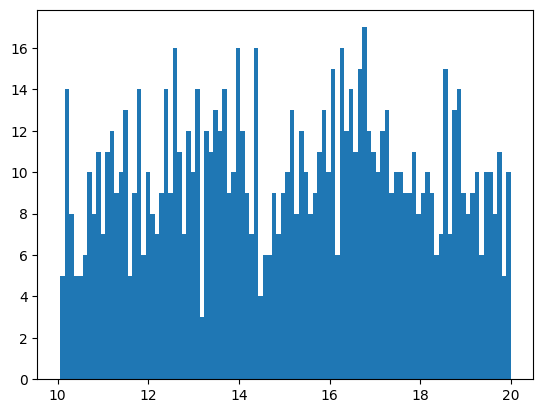

In [131]:
# 답안
import matplotlib.pyplot as plt
randoms = 10 + np.random.rand(1000) * 10 # randoms ~ U(10, 20)
plt.hist(randoms, bins=100)
plt.show()

## 예제 4
지시사항:
1. 1부터 12까지 총 12개의 연속하는 정수로 이루어진 (3, 4) 형태의 NumPy 배열을 생성하세요.
2. 조건 연산자를 활용한 인덱싱을 이용하여 1번에서 생성한 NumPy 배열의 원소들 중 2 또는 5의 배수만 추출하고, 그 결과를 내림차순으로 정렬한 뒤 출력하시오.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_4 = ________
    print(________)
```

In [132]:
# 답안

## 방법 1
array_4 = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])
## 방법 2
# array_4 = np.array(np.arange(start=1,
#                              stop=13,
#                              step=1).reshape(3, -1))

print(np.sort(array_4[(array_4 % 2 == 0) | (array_4 % 5 == 0)])[::-1])

[12 10  8  6  5  4  2]


## 예제 5
지시사항:<br>
1. 다음과 같은 Python list를 생성하세요.
```Python
    sample_list = [np.full(shape=(3,),
                           fill_value=8),
                   np.array([30, -15, 21]),
                   np.linspace(start=14,
                               stop=22,
                               num=3)]
```
2. `sample_list`안에 있는 각 NumPy 배열의 원소들의 평균값, 표준편차, 그리고 중앙값을 순서대로 구하고, 구한 순서대로 새로운 Python list에 구성하고 출력하시오.<br>
    __예시__: 각 배열의 평균값이 [3.0, 4.0, 5.0]이고 표준편차가 [1.5, 1.7, 1.9]이며 중앙값이 [1.0, 2.0, 3.0]이라면, 출력 결과는 [3.0, 1.5, 1.0, 4.0, 1.7, 2.0, 5.0, 1.9, 3.0]이다.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    sample_list = [np.full(shape=(3,),
                           fill_value=8),
                   np.array([30, -15, 21]),
                   np.linspace(start=14,
                               stop=22,
                               num=3)]
    list_5 = []
    for i in sample_list:
        list_5.append(________)
        list_5.append(________)
        list_5.append(________)
    print(list_5)
```

In [133]:
# 답안
sample_list = [np.full(shape=(3,),
                       fill_value=8),
               np.array([30, -15, 21]),
               np.linspace(start=14,
                           stop=22,
                           num=3)]
list_5 = []
for i in sample_list:
    list_5.append(np.mean(i))
    list_5.append(np.std(i))
    list_5.append(np.median(i))
print(list_5)

[8.0, 0.0, 8.0, 12.0, 19.44222209522358, 21.0, 18.0, 3.265986323710904, 18.0]


## 예제 6
지시사항:
1. 삼각함수의 특수각(0°, 30°, 60°, 90°)을 NumPy 배열로 생성하고 출력하세요.
2. 특수각에 해당하는 sin, cos, tan 값을 각각 구하고 소수점 둘째자리까지 반올림하여 출력하세요.<br>
   __참고__: NumPy의 삼각함수는 radian 값을 사용하기 때문에 아래 식과 같이 degree를 radian으로 변경해야 합니다. <br>
   (degree를 radian으로 변경하는 식: radian = degree * π / 180)
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_6 = ________
    print(array_6)
    print(________)
    print(________)
    print(________)
```

In [134]:
# 답안
array_6 = np.arange(start=0,
                    stop=91,
                    step=30)
print(array_6)
print(np.sin(array_6 * np.pi / 180).round(2))
print(np.cos(array_6 * np.pi / 180).round(2))
print(np.tan(array_6 * np.pi / 180).round(2))

[ 0 30 60 90]
[0.   0.5  0.87 1.  ]
[1.   0.87 0.5  0.  ]
[0.00000000e+00 5.80000000e-01 1.73000000e+00 1.63312394e+16]


## 예제 7
지시사항:
1. 다음 두 행렬에 대하여 내적 연산을 수행한 결과를, 소수점 아래 값을 제거하고 출력하시오.
```Python
    array_7a = np.array([[2.1, 3.5],
                         [4.2, 2.7],
                         [2.3, 1.9]])
    array_7b = np.array([[5, 2, 3],
                         [1, 3, 5]])
```
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python   
    array_7a = np.array([[2.1, 3.5],
                         [4.2, 2.7],
                         [2.3, 1.9]])
    array_7b = np.array([[5, 2, 3],
                         [1, 3, 5]])
    print(________)
```

In [135]:
# 답안
array_7a = np.array([[2.1, 3.5],
                     [4.2, 2.7],
                     [2.3, 1.9]])
array_7b = np.array([[5, 2, 3],
                     [1, 3, 5]])
print(np.trunc(np.dot(a=array_7a, b=array_7b)))

[[14. 14. 23.]
 [23. 16. 26.]
 [13. 10. 16.]]


## 예제 8
지시사항:
1. 다음과 같은 NumPy 배열을 생성하세요.
```Python
    array_8 = np.array([[2, 3],
                        [3, 4]])
```
2. NumPy의 linalg 모듈을 사용하지 않고, 입력 행렬의 역행렬을 구하는 사용자 정의 함수를 작성하세요.
3. 사용자 정의 함수를 활용해 계산한 역행렬과 1번에서 생성한 NumPy 배열의 내적을 구하고, 그 결과의 데이터 타입을 정수형으로 변경하여 출력하세요.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_8 = np.array([[2, 3],
                        [3, 4]])
    def matrix_inverse(mat):
        ...
        return ________
    print(________)
```

In [136]:
# 답안
array_8 = np.array([[2, 3],
                    [3, 4]])
def matrix_inverse(mat):
    x11 = mat[0, 0]
    x12 = mat[0, 1]
    x21 = mat[1, 0]
    x22 = mat[1, 1]
    det = (x11 * x22) - (x12 * x21)
    return (1 / det) * np.array([[ x22, -x12],
                                 [-x21,  x11]])
print(np.dot(a=matrix_inverse(array_8), b=array_8).astype(int))

[[1 0]
 [0 1]]


## 예제 9
지시사항:
다음과 같은 선형연립방정식이 있다고 가정합니다.
$$
    2x+3y=4\\
    5x+6y=5
$$
1. 위 선형연립방정식의 해를 NumPy의 linalg 모듈 중 `inv()`를 사용하여 구하세요.
2. 위 선형연립방정식의 해를 NumPy의 linalg 모듈 중 `solve()`를 사용하여 구하세요.<br>
    __참고__ np.linalg.solve(A, B)의 용례 참고: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_9A = np.array([[2, 3],
                         [5, 6]])
    array_9B = np.array([4, 5])
    print(________) # inv()
    print(________) # solve()
```

In [137]:
# 답안
array_9A = np.array([[2, 3],
                     [5, 6]])
array_9B = np.array([4, 5])
print(np.dot(a=np.linalg.inv(array_9A), b=array_9B))
print(np.linalg.solve(a=array_9A, b=array_9B))

[-3.          3.33333333]
[-3.          3.33333333]


## 예제 10
지시사항:
1. [100, 150) 사이에 존재하는 정수를 무작위로 30개 추출하여 (3, 10) 형태의 NumPy 배열로 생성하세요.
2. 해당 배열의 행과 열을 전치한 결과 출력하세요.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    array_10 = ________
    print(________)
```

In [138]:
# 답안
array_10 = np.random.randint(low=100, high=150, size=(3, 10))
## 방법 1
print(array_10.T)

## 방법 2
# print(np.transpose(array_10))

[[137 140 113]
 [121 128 149]
 [130 125 149]
 [149 120 105]
 [121 129 144]
 [138 106 108]
 [108 149 115]
 [136 137 126]
 [122 139 121]
 [148 130 116]]


## 예제 11
지시사항:
1. 다음과 같은 NumPy 배열을 생성하세요.
```Python
    sample_array = np.array([[2, 4, 6],
                             [8, 10, 12],
                             [14, 16, 18]])
```
2. 위 배열을 행을 기준으로 3개의 배열로 분할하세요.
3. 분할된 각 배열의 원소들을 제곱하세요.
4. 그 결과 중 불필요한 단일 차원 항목을 제거하여 원본 배열과 차원이 같게 하세요.
5. 원본 배열에 행을 기준으로 병합하고 출력하세요.
* 답안을 작성할 때는 '예시 답안'의 형태에 맞춰 알맞게 빈칸을 채워 작성하세요.

예시 답안:
```Python
    sample_array = np.array([[2, 4, 6],
                             [8, 10, 12],
                             [14, 16, 18]])
    array_11 = ________
    array_11 = ________
    array_11 = ________
    array_11 = ________
    print(array_11)
```

In [140]:
# 답안
sample_array = np.array([[2, 4, 6],
                         [8, 10, 12],
                         [14, 16, 18]])
array_11 = np.vsplit(sample_array,
                     indices_or_sections=3)
array_11 = np.square(array_11)
print(array_11.shape)
array_11 = np.squeeze(a=array_11, axis=1)
print(array_11.shape)
array_11 = np.vstack(tup=[sample_array, array_11])
print(array_11)

(3, 1, 3)
(3, 3)
[[  2   4   6]
 [  8  10  12]
 [ 14  16  18]
 [  4  16  36]
 [ 64 100 144]
 [196 256 324]]


## 예제 12
4장의 동물 사진에 대한 예측 확률이 다음과 같다. 예측 확률을 활용하여 4장을 가장 확률이 높은 동물로 각각 최종 예측하세요.

```python
prediction = np.array([[0.2, 0.6, 0.2], [0.7, 0.1, 0.2], [0.1, 0.1, 0.8], [0.3, 0.3, 0.4]])
class_names = ['강아지', '고양이', '호랑이']
```

In [145]:
# 답안
prediction = np.array([[0.2, 0.6, 0.2], [0.7, 0.1, 0.2], [0.1, 0.1, 0.8], [0.3, 0.3, 0.4]])
class_names = ['강아지', '고양이', '호랑이']

idx = np.argmax(prediction, axis=1)
print(idx)
class_names = np.array(class_names)
class_names[idx] # fancy indexing

[1 0 2 2]


array(['고양이', '강아지', '호랑이', '호랑이'], dtype='<U3')

## 예제 13

다음은 확생 명단과 중간고사.기말고사 점수 리스트이다. 중간고사와 기말고사 모두 90점을 넘은 학생에게 장학금을 줄 때 장학금을 받을 명단을 출력하세요.

```python
student_name = ['James', 'Ben', 'Sophia', 'Harry', 'Kelly', 'Mike', 'Alice']
mid = [97, 50, 70, 96, 98, 91, 100]
final = [91, 100, 90, 94, 97, 90, 90]
```

In [144]:
# 답안
student_name = ['James', 'Ben', 'Sophia', 'Harry', 'Kelly', 'Mike', 'Alice']
mid = [97, 50, 70, 96, 98, 91, 100]
final = [91, 100, 90, 94, 97, 90, 90]

name = np.array(student_name)
mid = np.array(mid)
final = np.array(final)
name[(mid > 90) & (final > 90)]

array(['James', 'Harry', 'Kelly'], dtype='<U6')